In [3]:
import time
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt
from PIL import ImageFont

[2025/01/29 22:55:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/ubuntu/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

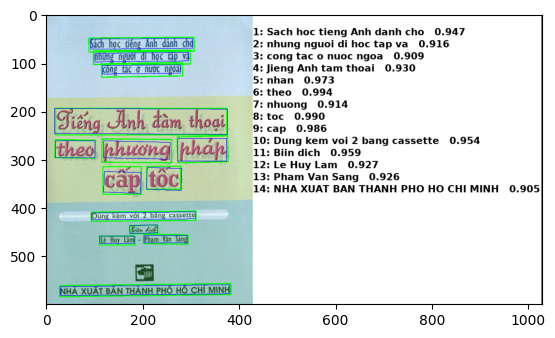

In [5]:
# Đường dẫn đến hình ảnh cần nhận diện
image_path = '/home/ubuntu/SonND/TestOCR/Data/2.jpg'

# Khởi tạo mô hình PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Thêm các ngôn ngữ bạn muốn nhận diện

# Đo thời gian bắt đầu
start_time = time.time()

# Nhận diện văn bản từ hình ảnh
result = ocr.ocr(image_path, cls=True)

# Đo thời gian kết thúc
end_time = time.time()
paddleocr_time = end_time - start_time

# In kết quả nhận diện
text_paddleocr = '\n'.join([line[1][0] for line in result[0]])
print("PaddleOCR:")
print(text_paddleocr)
print(f"Thời gian trả kết quả: {paddleocr_time:.2f} giây\n")

# Hiển thị hình ảnh với kết quả nhận diện
image = cv2.imread(image_path)
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Sử dụng font mặc định của hệ thống
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
font = ImageFont.truetype(font_path, 20)

im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)
im_show = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
plt.imshow(im_show)
plt.show()